### Import Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import collections
from collections import Counter
import seaborn as sns
%matplotlib inline  

/Users/tdavid/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Read in DataSet

In [2]:
dt = pd.read_csv('/Users/tdavid/documents/MIDS/w210/dataset-examples-master/yelp_academic_all.csv')
#dt = pd.read_csv('C:/Users/tdavid1.AMR/Downloads/yelp_academic_all.csv')

/Users/tdavid/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (0,8,14,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


### Create Functions For Future Use

In [9]:
remove_common_words = ['and','is','a','are','for','of','the','their','as','to','they','out','it','you',\
                       'i','was','in','that','my','we','this','on','with','at','but','be','so','there',\
                       'would','get','he','she','me','our','if','when','',' ','  ','were','or','us','its',\
                       'about','here','from','what','an','will','which','because','them','-']

def rcw(counter,word_list):
    for i in word_list:
        del counter[i]

def getwordbins(words):
    cnt = Counter()
    for word in words:
        cnt[word] += 1
    rcw(cnt,remove_common_words)
    return cnt


def common_words(filename, topwords):
    #txt = openfile(filename)
    #txt = removegarbage(txt)
    txt = filename
    words = txt.split(' ')
    bins = getwordbins(words)
    print 'Most common:'
    for key, value in bins.most_common(topwords):
        print "%s: %d" % (key,value)

### Record Star Ratings Associated With Particular Word

In [167]:
word_stars_list_all = list()

for i in range(0,len(dt)):
    try:
        if 'love' in dt.review_text[i]:
            #if 'not good' in dt.review_text[i]:
                #continue
            #else:
            word_stars_list_all.append(dt.review_stars[i])
    except:
        continue

##### Mean Rating of Word

In [168]:
print "Average Star Rating of Word: %.2f" % np.mean(word_stars_list_all)

Average Star Rating of Word: 4.16


##### Histogram

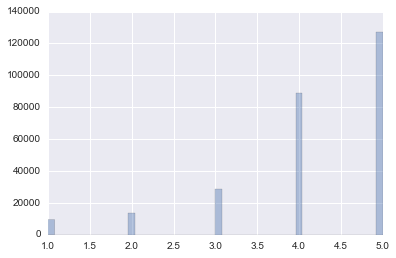

In [169]:
sns.distplot(word_stars_list_all,kde=False)

### Only Record Those Where Review Was Poor

In [172]:
word_text_list = list()
word_stars_list = list()

for i in range(0,len(dt)):
    try:
        if 'love' in dt.review_text[i]:
            #if 'not good' in dt.review_text[i]:
            #    continue
            #else:
                
            if dt.review_stars[i] < 4:
                word_stars_list.append(dt.review_stars[i])
                word_text_list.append(dt.review_text[i])
                
    except:
        continue

In [171]:
num = 0

print "number of stars: %d" % word_stars_list[num]

print "\n"
print "----------------------------------------------------------"
print "\n"

print "sentences containing '%s':" % 'good'
print "\n"

for j in word_text_list[num].lower().split('.'):
    try:
        if j.index('good') >= 0:
            print j.replace('\n', '').replace('\r', '')
            print '\n'
    except:
        continue

print "\n"
print "----------------------------------------------------------"
print "\n"

print "complete text:"
print "\n"
print word_text_list[num].lower().replace('\n', '').replace('\r', '')



number of stars: 2


----------------------------------------------------------


sentences containing 'good':


 goldberg's patient is a repeat of the experience i've had with so many other doctors in nyc -- good doctor, terrible staff




----------------------------------------------------------


complete text:


unfortunately, the frustration of being dr. goldberg's patient is a repeat of the experience i've had with so many other doctors in nyc -- good doctor, terrible staff.  it seems that his staff simply never answers the phone.  it usually takes 2 hours of repeated calling to get an answer.  who has time for that or wants to deal with it?  i have run into this problem with many other doctors and i just don't get it.  you have office workers, you have patients with medical needs, why isn't anyone answering the phone?  it's incomprehensible and not work the aggravation.  it's with regret that i feel that i have to give dr. goldberg 2 stars.


### Print Most Commonly Occurring Words In Current Review

In [109]:
m = word_text_list[num].lower().replace('\n', '').replace('\r', '').replace('.','').replace(',','').replace('  ','').replace("'","").split(' ')

c = collections.Counter(m)
#remove_common_words = ['and','is','a','are','for','of','the','their','as','to','they','out','it','you']

def rcw(counter,word_list):
    for i in word_list:
        del counter[i]

rcw(c,remove_common_words)

print 'Most common:'
for letter, count in c.most_common(10):
    print '%s: %d' % (letter, count)

Most common:
just: 3
food: 3
always: 3
inspector: 3
waiting: 2
like: 2
health: 2
place: 2
while: 2
don: 2


---

In [7]:
allstarstring = ""
for i in range(0,len(dt)):
    try:
        allstarstring = allstarstring + dt['review_text'][i].lower().replace('\n', ' ').replace('\r', ' ').replace('.','').replace(',',' ').replace('  ',' ').replace("'","")
    except:
        continue

In [22]:
word_stars_list_all = list()

for i in range(0,len(dt)):
    try:
        if 'food' in dt.review_text[i]:
            word_stars_list_all.append(dt.review_stars[i])
    except:
        continue
        
print "Average Star Rating of Word: %.2f" % np.nanmean(word_stars_list_all)

Average Star Rating of Word: 3.66


In [15]:
list_A = list()

words = allstarstring.split(' ')
bins = getwordbins(words)

for key in bins.most_common(50):
    list_A.append(key) 

In [13]:
word_stars_list_all = list()

for i in range(0,len(dt)):
    try:
        if 'food' in dt.review_text[i]:
            #if 'not good' in dt.review_text[i]:
                #continue
            #else:
            word_stars_list_all.append(dt.review_stars[i])
    except:
        continue
        
print "Average Star Rating of Word: %.2f" % np.nanmean(word_stars_list_all)

Average Star Rating of Word: 3.66


In [10]:
common_words(allstarstring,50)

Most common:
have: 1226598
not: 1114508
had: 1098341
good: 857101
place: 838688
food: 807480
all: 689010
very: 677049
like: 669570
great: 646115
just: 637028
one: 575721
time: 519363
service: 496642
up: 492872
really: 467530
go: 465716
some: 444124
your: 408624
back: 407804
can: 397832
been: 389832
more: 375132
only: 373982
also: 371522
no: 361793
by: 348870
dont: 342783
other: 331264
got: 324606
nice: 322504
even: 316606
has: 294260
too: 291840
im: 291067
do: 290460
well: 289878
little: 284293
than: 279553
after: 277414
best: 276160
didnt: 267648
love: 266752
always: 262469
ordered: 255748
much: 255414
ive: 253611
pretty: 244955
people: 242318
did: 240886


### Subset Those Reviews With 1 Star

In [73]:
dt_1star = dt[dt.review_stars == 1]
dt_1star = dt_1star.reset_index(drop=True)

In [74]:
onestarstring = ""
for i in range(0,len(dt_1star)):
    try:
        onestarstring = onestarstring + dt_1star['review_text'][i].lower().replace('\n', ' ').replace('\r', ' ').replace('.','').replace(',',' ').replace('  ',' ').replace("'","")
    except:
        continue

In [75]:
len(onestarstring)

125631672

In [123]:
common_words(onestarstring,50)

Most common:
not: 197022
have: 151605
had: 147012
food: 89805
no: 87277
place: 84152
just: 82614
all: 79834
one: 78345
up: 77578
like: 77047
back: 68987
time: 68946
service: 68348
go: 60041
even: 59564
after: 57762
never: 57594
said: 54430
dont: 52484
only: 52418
then: 51102
your: 50995
been: 50856
very: 50853
do: 50281
told: 50099
good: 50004
didnt: 48982
got: 48859
by: 48604
her: 48592
did: 43613
could: 43157
over: 42575
asked: 41016
minutes: 40231
went: 39974
other: 39285
order: 38772
came: 37961
more: 37845
some: 37566
people: 37253
can: 36164
who: 34891
ordered: 34793
how: 34168
off: 33947
know: 33377


### Subset Those Reviews With 2 Stars

In [77]:
dt_2star = dt[dt.review_stars == 2]
dt_2star = dt_2star.reset_index(drop=True)

In [78]:
twostarstring = ""
for i in range(0,len(dt_2star)):
    try:
        twostarstring = twostarstring + dt_2star['review_text'][i].lower().replace('\n', ' ').replace('\r', ' ').replace('.','').replace(',',' ').replace('  ',' ').replace("'","")
    except:
        continue

In [79]:
len(twostarstring)

112072101

In [124]:
common_words(twostarstring,50)

Most common:
not: 171612
had: 127251
have: 125545
food: 102730
just: 86606
good: 84141
like: 83616
place: 82915
all: 70503
one: 66319
very: 61959
up: 59692
no: 58431
service: 57991
time: 56350
really: 52160
go: 48918
back: 47508
only: 47194
some: 45654
dont: 44235
been: 43915
more: 43081
didnt: 42816
got: 40234
other: 40026
even: 39936
ordered: 39674
by: 38602
after: 37761
your: 35995
too: 34840
much: 34793
better: 34357
great: 33295
can: 33291
order: 33168
did: 33164
came: 33099
do: 32785
im: 32164
than: 31973
then: 31666
over: 31283
could: 30191
people: 29867
also: 29835
restaurant: 28725
pretty: 28269
went: 27868


### Subset Those Reviews With 3 Stars

In [81]:
dt_3star = dt[dt.review_stars == 3]
dt_3star = dt_3star.reset_index(drop=True)

In [82]:
threestarstring = ""
for i in range(0,len(dt_3star)):
    try:
        threestarstring = threestarstring + dt_3star['review_text'][i].lower().replace('\n', ' ').replace('\r', ' ').replace('.','').replace(',',' ').replace('  ',' ').replace("'","")
    except:
        continue

In [83]:
len(threestarstring)

162490397

In [125]:
common_words(threestarstring,50)

Most common:
not: 213498
have: 183612
good: 177414
had: 170599
food: 139933
place: 131003
like: 122893
just: 117895
all: 100553
very: 98036
one: 88590
really: 86540
some: 81969
up: 78161
service: 76818
time: 75972
go: 73168
great: 71527
more: 71159
pretty: 63350
other: 60361
nice: 60259
dont: 60079
back: 60017
only: 59006
too: 58220
can: 57768
your: 57294
little: 56610
been: 55620
no: 55552
also: 55061
got: 53729
didnt: 52934
by: 51342
than: 51236
much: 49944
im: 48551
ordered: 48314
do: 45933
well: 42404
has: 41679
better: 41447
after: 41071
think: 40781
even: 40349
people: 40154
did: 39871
restaurant: 39754
chicken: 39249


### Subset Those Reviews With 4 Stars

In [85]:
dt_4star = dt[dt.review_stars == 4]
dt_4star = dt_4star.reset_index(drop=True)

In [86]:
fourstarstring = ""
for i in range(0,len(dt_4star)):
    try:
        fourstarstring = fourstarstring + dt_4star['review_text'][i].lower().replace('\n', ' ').replace('\r', ' ').replace('.','').replace(',',' ').replace('  ',' ').replace("'","")
    except:
        continue

In [87]:
len(fourstarstring)

305388835

In [126]:
common_words(fourstarstring,50)

Most common:
have: 356428
good: 325423
had: 316842
not: 287394
place: 259371
food: 239444
very: 226903
great: 226271
like: 204846
all: 201304
just: 171513
one: 169090
really: 159877
some: 151769
time: 146119
up: 138367
service: 134819
go: 131973
can: 131360
also: 128219
nice: 122695
your: 122140
more: 117627
only: 117129
little: 109837
back: 109223
been: 105701
other: 100121
too: 97623
by: 96937
well: 96705
dont: 94291
pretty: 93331
got: 92045
has: 90074
im: 89828
than: 87108
always: 86948
love: 83156
no: 79488
definitely: 79269
try: 78564
chicken: 76760
even: 76572
do: 76301
much: 75981
ive: 75778
menu: 75618
ordered: 75160
best: 72502


### Subset Those Reviews With 5 Stars

In [89]:
dt_5star = dt[dt.review_stars == 5]
dt_5star = dt_5star.reset_index(drop=True)

In [90]:
fivestarstring = ""
for i in range(0,len(dt_5star)):
    try:
        fivestarstring = fivestarstring + dt_5star['review_text'][i].lower().replace('\n', ' ').replace('\r', ' ').replace('.','').replace(',',' ').replace('  ',' ').replace("'","")
    except:
        continue

In [91]:
len(fivestarstring)

323429922

In [127]:
common_words(fivestarstring,50)

Most common:
have: 409400
had: 336641
great: 295087
place: 281250
not: 244977
very: 239311
all: 236815
food: 235561
good: 220114
like: 181167
just: 178387
one: 173380
time: 171976
service: 158666
go: 151616
best: 145692
your: 142199
can: 139248
up: 139075
love: 137906
really: 136184
been: 133738
also: 132525
some: 127163
back: 122068
always: 121193
by: 113384
has: 106218
more: 105420
ive: 102697
well: 101182
even: 100185
only: 98234
friendly: 96240
nice: 95362
staff: 91831
dont: 91701
other: 91471
got: 89738
im: 89564
amazing: 89026
do: 85164
try: 83739
definitely: 83455
vegas: 83194
no: 81039
than: 79926
first: 79009
little: 78147
too: 76201


In [8]:
bigram_list = list()
for j in range(0,len(dt)):

    import re

    a = ' '
    txt_line = str(dt.review_text[j]).lower()
    txt_line = re.sub(r"http\S+",'',txt_line)
    txt_line = txt_line.replace('\n', '').replace('\r', '').replace(';','').replace('  ','').replace(',','')
    txt_line = txt_line.replace("'","").replace(")",'').replace("(",'').replace('!',' ').replace('.',' ').replace('?',' ')
    txt_line = txt_line.replace('"','').replace('&','').replace('/','').replace(':','').replace('-',' ').replace('~',' ')
    txt_line = txt_line.replace('*','')
    for i in txt_line.split():
        if a <> '' and i <> '' and a <> ' ' and i <> ' ': #if (' ' not in a + i) and ('--' not in a+i):
            bigram_list.append(a + ' ' + i)
            #print a + ' ' + i
        a = i

In [ ]:
Counter(bigram_list).most_common(50) 

----

In [3]:
bigram_list = list()
for j in range(0,len(dt)):

    import re

    a = ' '
    txt_line = str(dt.review_text[j]).lower()
    txt_line = re.sub(r"http\S+",'',txt_line)
    txt_line = txt_line.replace('\n', '').replace('\r', '').replace(';','').replace('  ','').replace(',','')
    txt_line = txt_line.replace("'","").replace(")",'').replace("(",'').replace('!',' ').replace('.',' ').replace('?',' ')
    txt_line = txt_line.replace('"','').replace('&','').replace('/','').replace(':','').replace('-',' ').replace('~',' ')
    txt_line = txt_line.replace('*','')
    for i in txt_line.split():
        if a <> '' and i <> '' and a <> ' ' and i <> ' ': #if (' ' not in a + i) and ('--' not in a+i):
            d = a + ' ' + i
            if i == 'good':
                bigram_list.append(a + ' ' + i)
                #print a + ' ' + i
        a = i

In [4]:
cc = Counter(bigram_list)

In [6]:
for key,value in cc.most_common(500):
    print str(key).split(' ')[0].replace('(','').replace("'","") + " " + "(%d)" % value

a (140838)
was (85894)
very (81335)
pretty (55573)
really (53584)
is (39151)
so (35494)
as (25961)
were (22542)
and (16347)
the (15538)
are (14710)
not (10707)
some (9551)
that (9399)
for (7152)
quite (7088)
of (6784)
its (6757)
be (6580)
always (5975)
with (5944)
but (5925)
how (5897)
all (5232)
had (4905)
damn (4484)
have (4337)
still (4245)
also (4077)
food (3867)
looked (3382)
only (3334)
in (3175)
tasted (3114)
been (2972)
darn (2912)
too (2752)
consistently (2670)
taste (2338)
service (2194)
surprisingly (2182)
many (2167)
sooo (2111)
soooo (2047)
enough (1967)
it (1963)
wasnt (1887)
has (1830)
this (1771)
overall (1737)
super (1718)
to (1690)
look (1672)
just (1613)
get (1588)
any (1487)
heard (1431)
no (1423)
real (1398)
feel (1360)
tastes (1339)
place (1317)
want (1293)
find (1255)
such (1216)
looks (1206)
sooooo (1149)
fairly (1092)
sounded (1084)
good (1082)
other (1075)
soo (1024)
crazy (980)
both (978)
thats (929)
actually (929)
one (884)
atmosphere (848)
something (835)
m